In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is available')
else:
  print('GPU is not available !')


GPU is not available !


In [3]:
val_dir ='C:/Users/Lenovo/Downloads/forest/the_wildfire_dataset_2n_version/val'
train_dir ='C:/Users/Lenovo/Downloads/forest/the_wildfire_dataset_2n_version/train'
test_dir ='C:/Users/Lenovo/Downloads/forest/the_wildfire_dataset_2n_version/test'

In [4]:
classes = os.listdir(train_dir)
numOfClasses = len(classes)

In [5]:
print(f'num of classes {numOfClasses}')
print(f'classes {classes}')

num of classes 2
classes ['fire', 'nofire']


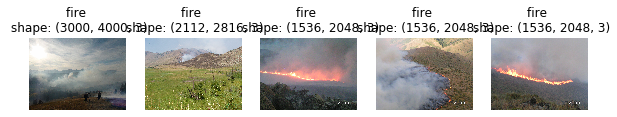

In [6]:
plt.figure(figsize=(10,12))
for i in range (5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

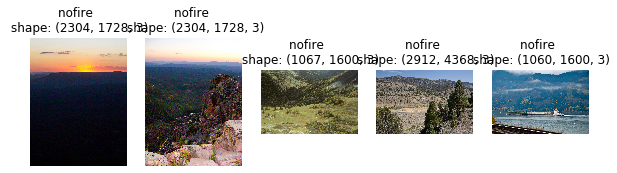

In [7]:
plt.figure(figsize=(10,12))
for i in range (5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [8]:
img_width, img_height = 150, 150
batch_size = 32 

# Data generators
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [9]:
class_mapping = train_generator.class_indices
class_names = list(class_mapping.keys())
print('Class_Names:', class_names)

Class_Names: ['fire', 'nofire']


In [10]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'), 
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'), 
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),                           
    Dense(512, activation='relu'),        
    Dropout(0.5),
    Dense(1, activation='sigmoid')        
])

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),         
    epochs = 12,
    validation_data = val_generator,
    validation_steps = len(val_generator)          
)


Epoch 1/12
59/59 [==============================] - 881s 15s/step - loss: 0.5114 - accuracy: 0.7472 - val_loss: 0.5133 - val_accuracy: 0.7512
Epoch 2/12
59/59 [==============================] - 858s 15s/step - loss: 0.4843 - accuracy: 0.7658 - val_loss: 0.4669 - val_accuracy: 0.7687
Epoch 3/12
59/59 [==============================] - 1627s 28s/step - loss: 0.4711 - accuracy: 0.7684 - val_loss: 0.4667 - val_accuracy: 0.7488
Epoch 4/12
59/59 [==============================] - 830s 14s/step - loss: 0.4601 - accuracy: 0.7817 - val_loss: 0.4614 - val_accuracy: 0.7438
Epoch 5/12
59/59 [==============================] - 731s 12s/step - loss: 0.4240 - accuracy: 0.7970 - val_loss: 0.4189 - val_accuracy: 0.7811
Epoch 6/12
59/59 [==============================] - 497s 8s/step - loss: 0.4100 - accuracy: 0.8055 - val_loss: 0.4310 - val_accuracy: 0.7886
Epoch 7/12
59/59 [==============================] - 646s 11s/step - loss: 0.4081 - accuracy: 0.8098 - val_loss: 0.4261 - val_accuracy: 0.7836
Epoch 

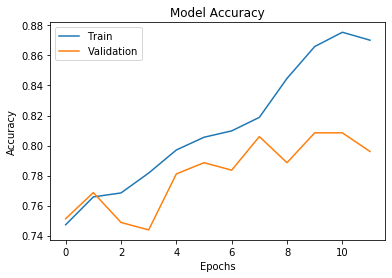

In [14]:

# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

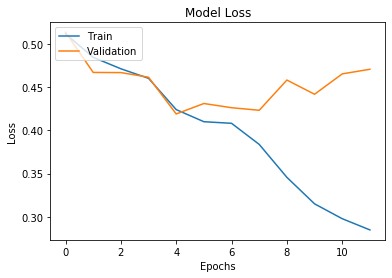

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
     

In [16]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

 1/12 [=>............................] - ETA: 1:08 - loss: 0.4027 - accuracy: 0.8125

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:2921: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


 3/12 [======>.......................] - ETA: 1:02 - loss: 0.4864 - accuracy: 0.8021

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:2921: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


 9/12 [=====================>........] - ETA: 21s - loss: 0.4660 - accuracy: 0.7882

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:2921: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


12/12 [==============================] - 85s 7s/step - loss: 0.4579 - accuracy: 0.7943
Test Accuracy: 0.7943


In [17]:

# Save the model
model.save('FFD.keras')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()
     


In [20]:
os.listdir('C:/Users/Lenovo/Downloads/forest/the_wildfire_dataset_2n_version/test/nofire')
     

['23289748533_1a14a0f249_o.jpg',
 '24498907094_491ca433dd_o.jpg',
 '33696343816_811bd98925_o.jpg',
 '35554264024_b33afa21ac_o.jpg',
 '35581707273_fed23248e8_o.jpg',
 '36644001004_f3e3a56edc_o.jpg',
 '39728540251_888dc24afa_o.jpg',
 '41058079202_08ce34a338_o.jpg',
 '42376136734_b4524237bf_o.jpg',
 '43078090081_07d1f9ec0f_o.jpg',
 '45636031272_8408d32834_o.jpg',
 '49200563427_e5295b4455_o.jpg',
 '49422069676_3e89abc052_o.jpg',
 '50010867961_903b6432f7_o.jpg',
 '50380847112_db217aea45_o.jpg',
 '51099217941_143488e656_o.jpg',
 '52357656897_dde5e5a66a_o.jpg',
 '52358616216_ec885ff145_o.jpg',
 '52358931719_b6fbcc77f2_o.jpg',
 '52359026765_4a4ba189c8_o.jpg',
 '52359041065_1566fd6ec1_o.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 '52452051055_4e2a4e4de0_o.jpg',
 '53078944067_43c7e3552a_o.jpg',
 'adrian-mag-l9p-7JBmVFE-unsplash.jpg',
 'alan-hardman-pLq3oZDUEWk-unsplash.jpg',
 'ales-krivec-7-Og8aZTRyM-unsplash.jpg',
 'ales-krivec-sTEg_SLAyUs-unsplash.jpg',
 'ales-krivec-VfMgiZscSXE-unsplash.jpg',
 'a